In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
# X is the two dimension matrix which represents the axis of the data set graph.
# y is the matrix which contains the type of each data.

X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print("X dimensions :", X.shape)
print("y dimensions :", y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap="summer")
plt.show()

agregation : z(x1, x2) = w1x1 + w2x2 + b

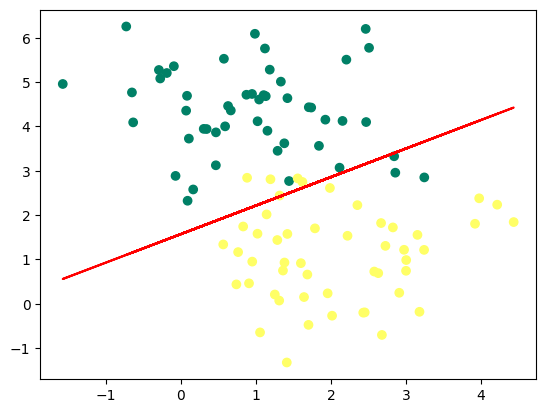

In [7]:
# Notable parameters (seems to work properly) :
# w1 = 0.45
# w2 = -0.70 
# b = 1.10


def agregation_function(w1: float, w2: float, b: float, np_abcisse, np_ordinate) -> tuple:
    """
    `w1 : First synapse strength.`
    `w2 : Second synapse strentgh.`
    `b : Bias.`
    `np_abcisse : Numpy array of all abcisse of the dataset of points.`
    `np_ordinate : Numpy array of all ordinates of the dataset of points.`

    Return a tuple of ordinates preview and type of point.
    """
    affine_ordinate = (-w1 * np_abcisse - b)/w2
    result = w1 * np_abcisse + w2 * np_ordinate + b

    return (affine_ordinate, result >= 0, result)


plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.plot(X[:,0], agregation_function(0.45, -0.70, 1.10, X[:,0], X[:,1])[0], c="red")




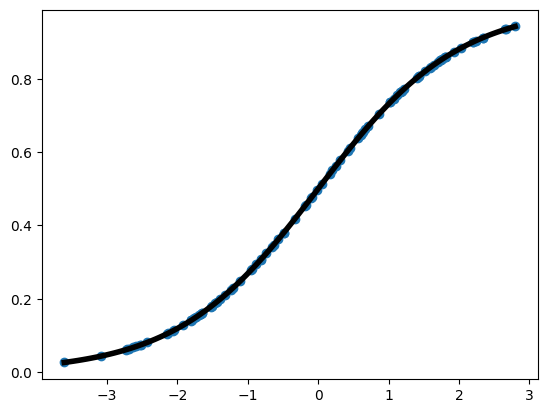

In [13]:
agregation_value = agregation_function(0.45, -0.70, 1.10, X[:,0], X[:,1])[2]
datatest_curve = np.linspace(np.min(agregation_value), np.max(agregation_value), 100)


def sigmoid(z: float) -> float:
    """
    `z : Image of the agregation function.`

    Return the image of z by the sigmoid mathematical function.
    """
    sigmoid_image: float = 1/(1 + np.exp(-z))

    return sigmoid_image


plt.scatter(agregation_value, sigmoid(agregation_value))
plt.plot(datatest_curve, sigmoid(datatest_curve), linewidth=4, c="black")

log_loss : -1/m * somme(i=1, m)( yi*log(ai) + (1-yi)log(1-ai) )


In [23]:
# `agregation_value` is a numpy array which contains all the image of all the points by the agregation function.

def log_loss_function(y_data, agregation_dataset) -> float:
    """
    y_data : numpy array which contains all the data natures of the data in the original dataset (X).
    agregation_dataset : tuple of ordinates preview and type of point
    """
    log_loss_image = 0

    for i in range(np.size(y_data)):
        log_loss_image += y_data[i] * np.log(sigmoid(agregation_dataset[i])) + (1-y_data[i]) * np.log(1-sigmoid(agregation_dataset[i]))
    log_loss_image = -1/(np.size(y_data)) * log_loss_image

    return log_loss_image[0]

log_loss_function(y, agregation_value)

np.float64(0.2837785566817584)

In [ ]:
# def gradient():